In [132]:
# Import libraries for Calcuations and visualization
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Import tkinter for GUI
import tkinter as tk
from tkinter import ttk, messagebox

In [133]:
# Import data from csv file
df = pd.read_csv("social media influencers-TIKTOK - ---DEC 2022.csv")
# Check for missing values in the DataFrame
#missing_values = df.isna().sum()
#print(missing_values)
#df.head()

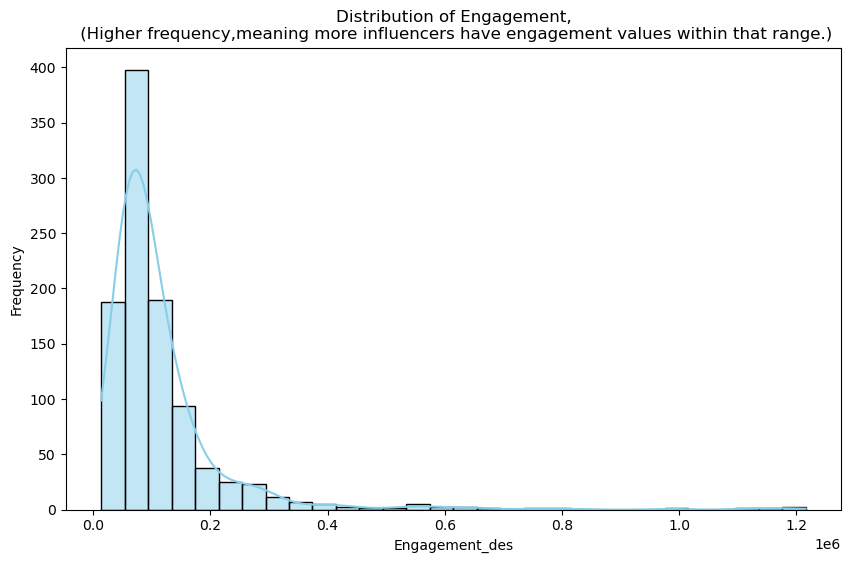

In [134]:
# Remove 'M' and 'K' from follower values and convert to float
df['followers'] = df['followers'].replace({'M': 'e6', 'K': 'e3'}, regex=True).map(pd.eval).astype(float)
df['views(avg)'] = df['views(avg)'].replace({'M': 'e6', 'K': 'e3'}, regex=True).map(pd.eval).astype(float)
df['likes(avg.)'] = df['likes(avg.)'].replace({'M': 'e6', 'K': 'e3'}, regex=True).map(pd.eval).astype(float)
df['comments(avg.)'] = df['comments(avg.)'].replace({'M': 'e6', 'K': 'e3'}, regex=True).map(pd.eval).astype(float)
df['shares(avg.)'] = df['shares(avg.)'].replace({'M': 'e6', 'K': 'e3'}, regex=True).map(pd.eval).astype(float)

# Normalize the features (followers, views, likes, comments, shares)
df['followers_norm'] = (df['followers'] - df['followers'].min()) / (df['followers'].max() - df['followers'].min())
df['views_norm'] = (df['views(avg)'] - df['views(avg)'].min()) / (df['views(avg)'].max() - df['views(avg)'].min())
df['likes_norm'] = (df['likes(avg.)'] - df['likes(avg.)'].min()) / (df['likes(avg.)'].max() - df['likes(avg.)'].min())
df['comments_norm'] = (df['comments(avg.)'] - df['comments(avg.)'].min()) / (df['comments(avg.)'].max() - df['comments(avg.)'].min())
df['shares_norm'] = (df['shares(avg.)'] - df['shares(avg.)'].min()) / (df['shares(avg.)'].max() - df['shares(avg.)'].min())


# Calculate engagement (average of likes, comments, and shares)
df['engagement_des'] = (df['likes(avg.)'] + df['comments(avg.)'] + df['shares(avg.)']) / 3

# Summary statistics for engagement
engagement_stats = df['engagement_des'].describe()

# Visualize engagement distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_des'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Engagement,\n (Higher frequency,meaning more influencers have engagement values within that range.)')
plt.xlabel('Engagement_des')
plt.ylabel('Frequency')
plt.show();



In [135]:
# Calculate engagement percentage
df['engagement'] = (df['likes(avg.)'] + df['comments(avg.)'] + df['shares(avg.)']) / df['followers'] * 100

# Define criteria for "good" influencer
engagement_threshold = 7  # Threshold for engagement  
followers_threshold = .02  # Threshold for followers

# Determine candidate status
df['Candidate Status'] = df.apply(lambda row: 'Good' if (row['engagement'] > engagement_threshold) and (row['followers_norm'] > followers_threshold) else 'Not Good', axis=1)

In [136]:
# Feature matrix
X = df[['followers','views(avg)', 'likes(avg.)', 'comments(avg.)', 'shares(avg.)']]

# Target varaible
y = df['Candidate Status'] 

In [137]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = clf.predict(X_test)
# np.mean(y_pred == y_test)


In [138]:
# Calculate the accuracy on the training data
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [139]:
# Calculate the accuracy on the testing data
test_accuracy = clf.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.96


In [140]:
# improve model
np.random.seed(42)
for i in range(10, 100, 10):
    #print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    #print(f"Model accuracy on test set:{clf.score(X_test, y_test) * 100:.2f}%")
    

In [141]:
# save model and load it
# import pickle
# pickle.dump(clf, open("forest_model_new.pkl", "wb"))

In [142]:
# loaded_model = pickle.load(open("forest_model_new.pkl", "rb"))
# loaded_model.score(X_test, y_test)

In [143]:
# Create the main Tkinter window
root = tk.Tk()
root.title("Influencer Evaluation System")

# Function to show custom error message and resolve hight error message
def show_error_message():
    error_window = tk.Toplevel(root)
    error_window.title("Error")
    error_window.geometry("300x100")

    label = ttk.Label(error_window, text="Influencer not found.")
    label.pack(pady=10)

    ok_button = ttk.Button(error_window, text="OK", command=error_window.destroy)
    ok_button.pack()

# Function to evaluate an influencer
def evaluate_influencer():
    try:
        # Get the influencer name from the input field and Remove leading and trailing spaces
        influencer_name = entry_name.get().strip() 

        # Find the influencer in the DataFrame
        influencer_data = df[df['Tiktoker name'] == influencer_name]

        # If influencer not found, show error message
        if len(influencer_data) == 0:
            show_error_message()
            return

        # Extract the features for the influencer
        features = influencer_data[['followers', 'views(avg)', 'likes(avg.)', 'comments(avg.)', 'shares(avg.)']].iloc[0]

        # Make prediction for the influencer
        prediction = clf.predict([features])[0]

        # Change the color of the status label based on the prediction
        if prediction == 'Good':
            lbl_status.config(text="Good", foreground="green")
            canvas.itemconfig(circle, fill="green")
        else:
            lbl_status.config(text="Not Good", foreground="red")
            canvas.itemconfig(circle, fill="red")
    except ValueError:
        show_error_message()

# Create and place the influencer name entry field
label_name = ttk.Label(root, text="Influencer TikTok Name:")
label_name.grid(row=0, column=0, padx=10, pady=5, sticky="w")
entry_name = ttk.Entry(root, width=20)
entry_name.grid(row=0, column=1, padx=10, pady=5)

# Create and place the evaluate button
btn_evaluate = ttk.Button(root, text="Evaluate", command=evaluate_influencer)
btn_evaluate.grid(row=1, columnspan=2, padx=10, pady=10)

# Create and place the canvas widget for drawing circles
canvas = tk.Canvas(root, width=20, height=20)
canvas.grid(row=2, column=0, padx=10, pady=5)

# Draw a circle with white color
circle = canvas.create_oval(5, 5, 15, 15, fill="white")

# Create and place the status label
lbl_status = ttk.Label(root, text="", width=10)
lbl_status.grid(row=2, columnspan=2, padx=10, pady=5)

# Labels for example TikTok names
label_example_names = ttk.Label(root, text=" Example TikTok Names:")
label_example_names.grid(row=3, column=0, padx=10, pady=5, sticky="w")

# Example TikTok names
label_suggested_names = ttk.Label(root, text=" mrbeast \n karolg \n williesalim \n centralcee")
label_suggested_names.grid(row=4, column=0, padx=10, pady=5, sticky="e")

# Run the main event loop
root.mainloop()
